In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline
from scipy.stats import norm, skew
from scipy import stats
import scipy

In [6]:
train_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train_df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1348,1349,20,RL,NaN,16196,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,215000
1304,1305,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,130000
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
126,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
1197,1198,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,7,2006,ConLw,Normal,144000
1070,1071,20,RL,72.0,10152,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,135000
399,400,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,241000
1339,1340,20,RL,120.0,9560,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,128500
1260,1261,60,RL,NaN,24682,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,181000


In [9]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
print(train_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [11]:
#DROP ID COLUMN
train_ID = train_df['Id']
test_ID = test_df['Id']
train_df.drop("Id", axis=1, inplace=True)
test_df.drop("Id", axis=1, inplace=True)

Text(0, 0.5, 'Number of the houses')

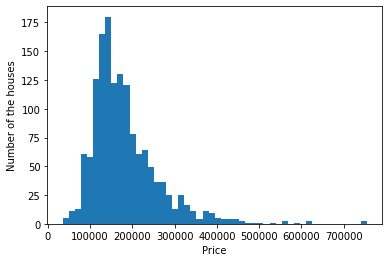

In [12]:
#Histogram of sale prices
plt.hist(train_df.SalePrice,bins=50)
plt.xlabel('Price')
plt.ylabel('Number of the houses')

In [13]:
#plot the LotFrontage
#plt.scatter(train_df.iloc[:,3],"SalePrice")

#plt.ylabel('Sale Price')
#plt.xlabel('LotFrontage')

In [14]:
obj=train_df.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

MSSubClass , 0
MSZoning , 0
LotFrontage , 259
LotArea , 0
Street , 0
Alley , 1369
LotShape , 0
LandContour , 0
Utilities , 0
LotConfig , 0
LandSlope , 0
Neighborhood , 0
Condition1 , 0
Condition2 , 0
BldgType , 0
HouseStyle , 0
OverallQual , 0
OverallCond , 0
YearBuilt , 0
YearRemodAdd , 0
RoofStyle , 0
RoofMatl , 0
Exterior1st , 0
Exterior2nd , 0
MasVnrType , 8
MasVnrArea , 8
ExterQual , 0
ExterCond , 0
Foundation , 0
BsmtQual , 37
BsmtCond , 37
BsmtExposure , 38
BsmtFinType1 , 37
BsmtFinSF1 , 0
BsmtFinType2 , 38
BsmtFinSF2 , 0
BsmtUnfSF , 0
TotalBsmtSF , 0
Heating , 0
HeatingQC , 0
CentralAir , 0
Electrical , 1
1stFlrSF , 0
2ndFlrSF , 0
LowQualFinSF , 0
GrLivArea , 0
BsmtFullBath , 0
BsmtHalfBath , 0
FullBath , 0
HalfBath , 0
BedroomAbvGr , 0
KitchenAbvGr , 0
KitchenQual , 0
TotRmsAbvGrd , 0
Functional , 0
Fireplaces , 0
FireplaceQu , 690
GarageType , 81
GarageYrBlt , 81
GarageFinish , 81
GarageCars , 0
GarageArea , 0
GarageQual , 81
GarageCond , 81
PavedDrive , 0
WoodDeckSF , 0
Open

<AxesSubplot:>

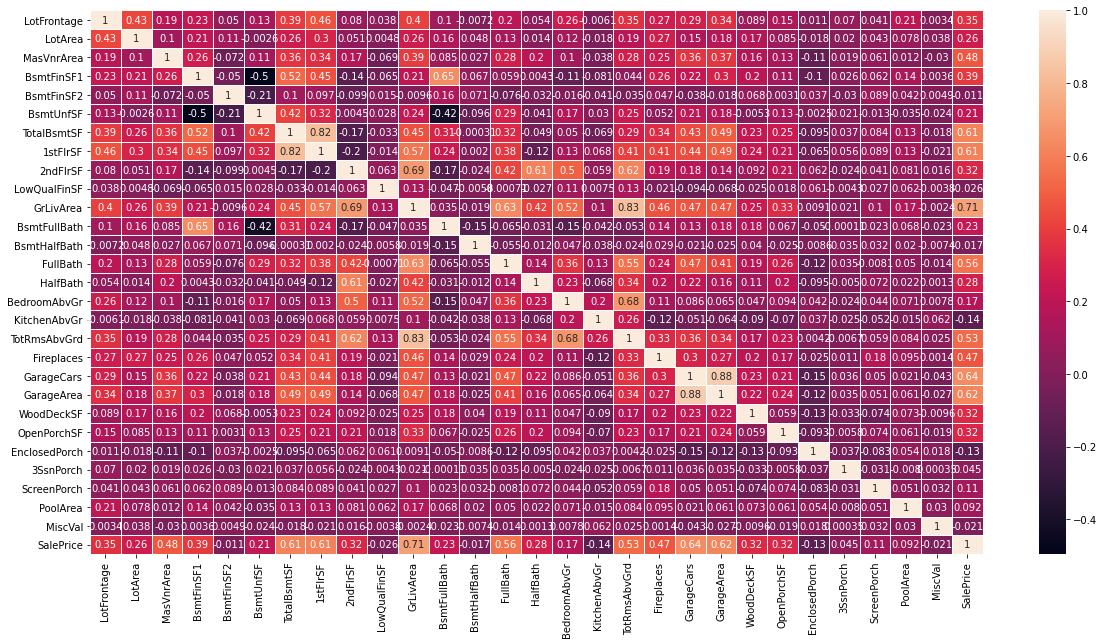

In [15]:
#Numerical feature correlation
plt.figure(figsize = (20,10))
internal_chars = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
                 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']
corrmat = train_df[internal_chars].corr()
sns.heatmap(corrmat,square=False,linewidths=.5,annot=True)

In [16]:
print(corrmat["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


looks like GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath features have high correlation to the saleprice.

****1.Data Processing****

1.1 Outliers

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

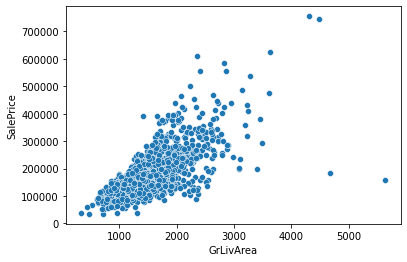

In [17]:
#Deal with outliers in GrLivArea
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_df)

In [18]:
train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<400000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [19]:
train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<400000)].index

Int64Index([523, 1298], dtype='int64')

In [20]:
ind_drop = train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<400000)].index

In [21]:
train_df = train_df.drop(ind_drop,axis=0)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

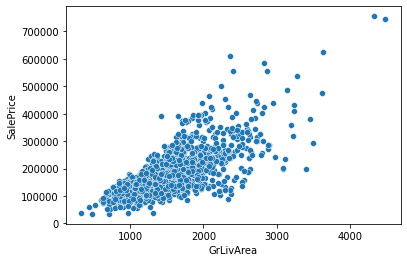

In [22]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_df)

1.2 Target Variable


 mu = 180932.92 and sigma = 79467.79



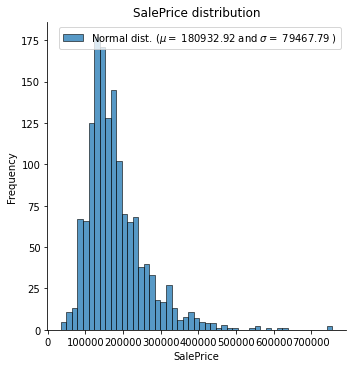

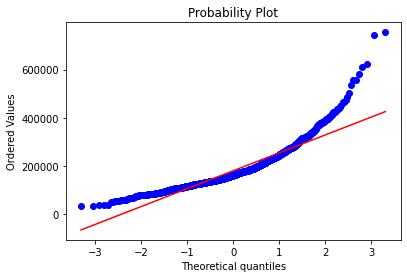

In [23]:
sns.displot(train_df['SalePrice'])
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get the probability plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

1.3 Log-transformation of the target

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



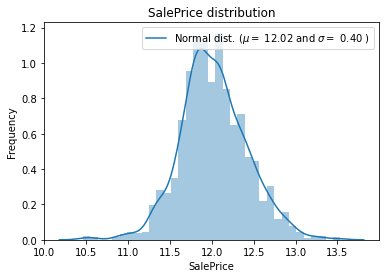

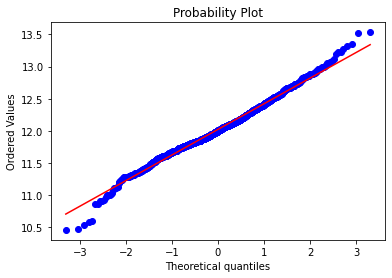

In [24]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

#check the new distribution
sns.distplot(train_df['SalePrice'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the probability plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

The skew seems now corrected and the data appears more normally distributed.



**2.Feature engineering**

In [25]:
#Concatenate the train and test dataset
y_train = train_df.SalePrice.values
all_df = pd.concat((train_df,test_df)).reset_index(drop=True)
all_df.drop(["SalePrice"],axis=1,inplace=True)
#print("all_df size: {}".format(all_df.shape))
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2431 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2915 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

2.1 Missing values

In [26]:
#Check the missing value ratio of each feature
all_df_na = (all_df.isnull().sum() / len(all_df)) * 100
all_df_na = all_df_na.drop(all_df_na[all_df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_df_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

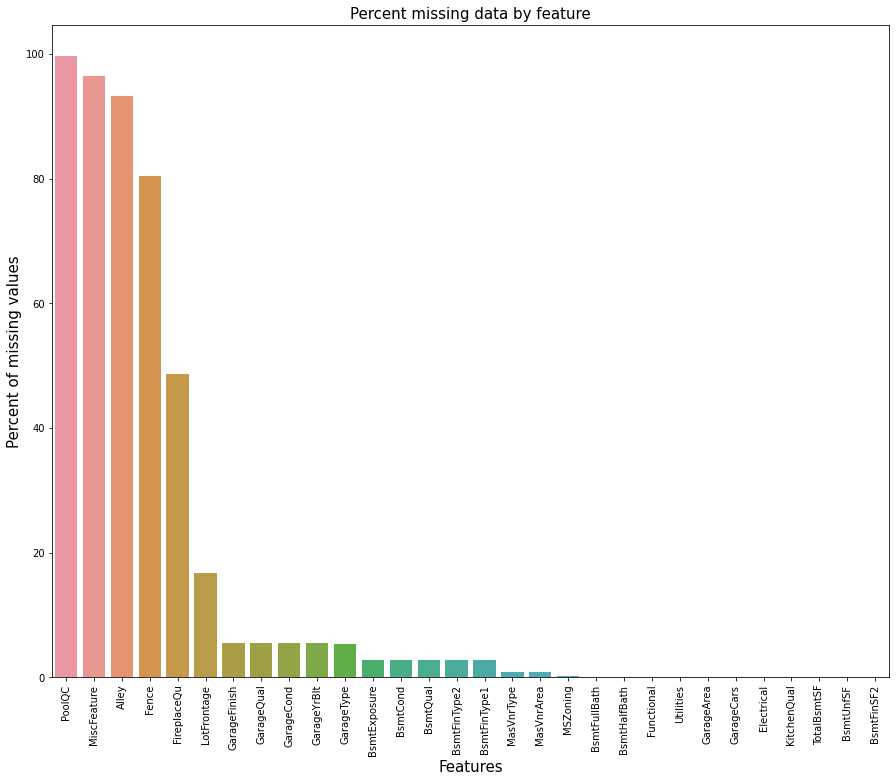

In [27]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_df_na.index, y=all_df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

2.2 Imputing missing values

* PoolQC

In [28]:
# NA means "No pool" , so we can fill in with none
all_df["PoolQC"].unique()
all_df["PoolQC"] = all_df["PoolQC"].fillna("None")

* MiscFeature

In [29]:
# NA means "no misc feature"
all_df["MiscFeature"].unique()
all_df["MiscFeature"] = all_df["MiscFeature"].fillna("None")

* Alley

In [30]:
all_df["Alley"].unique()
all_df["Alley"] = all_df["Alley"].fillna("None")

* Fence

In [31]:
all_df["Fence"] = all_df["Fence"].fillna("None")

* FireplaceQu

In [32]:
all_df["FireplaceQu"] = all_df["FireplaceQu"].fillna("None")

* LotFrontage

In [33]:
#LotFrontage: Linear feet of street connected to property,Neighborhood: Physical locations within Ames city limits,fill in missing values by the median LotFrontage of the neighborhood
all_df["LotFrontage"] = all_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

* GarageType, GarageFinish, GarageQual and GarageCond

In [34]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_df[col] = all_df[col].fillna('None')

* GarageYrBlt, GarageArea and GarageCars

In [35]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_df[col] = all_df[col].fillna(0)

* BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath(num)

In [36]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_df[col] = all_df[col].fillna(0)

* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2(cat)

In [37]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_df[col] = all_df[col].fillna('None')

* MasVnrArea and MasVnrType

In [38]:
all_df["MasVnrType"] = all_df["MasVnrType"].fillna("None")
all_df["MasVnrArea"] = all_df["MasVnrArea"].fillna(0)

* MSZoning (The general zoning classification)

In [39]:
all_df.MSZoning.value_counts()#The majority of the data are RL, so we can fill in the missing data with mode

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [40]:
all_df['MSZoning'] = all_df['MSZoning'].fillna(all_df['MSZoning'].mode()[0])

* Utilities


In [41]:
all_df.Utilities.value_counts() #This feature won't help with the predicting so we can just delete it

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [42]:
all_df = all_df.drop(['Utilities'], axis=1)

* Functional

In [43]:
#data description says NA means typical
all_df["Functional"] = all_df["Functional"].fillna("Typ")

* Electrical

In [44]:
all_df.Electrical.value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [45]:
all_df['Electrical'] = all_df['Electrical'].fillna(all_df['Electrical'].mode()[0])

* KitchenQual

In [46]:
all_df['KitchenQual'] = all_df['KitchenQual'].fillna(all_df['KitchenQual'].mode()[0])

* Exterior1st and Exterior2nd

In [47]:
#only has one missing value so just fill in with mode
all_df['Exterior1st'] = all_df['Exterior1st'].fillna(all_df['Exterior1st'].mode()[0])
all_df['Exterior2nd'] = all_df['Exterior2nd'].fillna(all_df['Exterior2nd'].mode()[0])

* SaleType

In [48]:
all_df['SaleType'] = all_df['SaleType'].fillna(all_df['SaleType'].mode()[0])

* MSSubClass

In [49]:
all_df['MSSubClass'] = all_df['MSSubClass'].fillna("None")

In [50]:
#double check the missing values
all_df_na = (all_df.isnull().sum() / len(all_df)) * 100
all_df_na = all_df_na.drop(all_df_na[all_df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_df_na})
missing_data.head()

,Missing Ratio


2.3 Data Correlation

<AxesSubplot:>

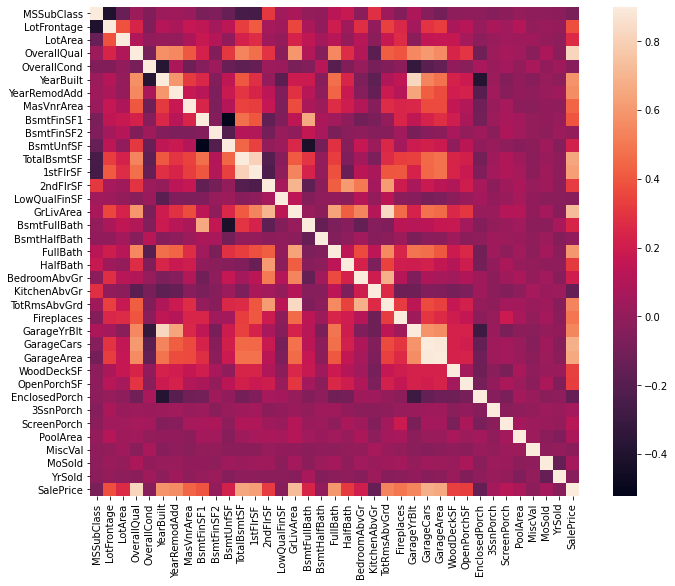

In [51]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

2.4 Transform the datatype of numerical values that are really categorical

In [52]:
all_df['MSSubClass'] = all_df['MSSubClass'].apply(str)
all_df['OverallCond'] = all_df['OverallCond'].astype(str)

all_df['YrSold'] = all_df['YrSold'].astype(str)
all_df['MoSold'] = all_df['MoSold'].astype(str)

2.5 Label encoding the categorical variables which have ordering set

In [53]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for f in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_df[f].values)) 
    all_df[f] = lbl.transform(list(all_df[f].values))
        
print('Shape all_df: {}'.format(all_df.shape))

Shape all_df: (2917, 78)


2.6 Creat new features

In [54]:
#Add total area
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']

In [55]:
#Add skewed features
numeric_feats = all_df.dtypes[all_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


2.7 Box Cox Transformation of (highly) skewed features

In [56]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_df[feat] = boxcox1p(all_df[feat], lam)
    

There are 59 skewed numerical features to Box Cox transform


2.8 Get dummy categorical features

In [57]:
all_df = pd.get_dummies(all_df)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 220 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(59), uint8(161)
memory usage: 1.8 MB


**3.Modelling**

In [58]:
#Get new train and test data
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
train = all_df[:ntrain]
test = all_df[ntrain:]

In [59]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

3.1 Define cross validation strategy

In [60]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

**Base models**

* LASSO Regression :

In [61]:
#make robust to outliers
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

* Elastic Net Regression :

In [62]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

* Kernel Ridge Regression :

In [63]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

* Gradient Boosting Regression :

In [64]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


* XGBoost :

In [65]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

* LightGBM :

In [66]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [67]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [68]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1116 (0.0074)



In [69]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



In [70]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1167 (0.0083)



In [71]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[05:16:26] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:16:30] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:16:35] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:16:39] WARNING: ..

In [72]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6

In [73]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [74]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[05:16:51] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.07885801377006138


In [75]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.07169383068991829


In [77]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = model_xgb
sub.to_csv('submission.csv',index=False)